# Text Mining

### Load data and check data

In [3]:
rawData = open("SMSSpamCollection.tsv").read()
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [4]:
import pandas as pd
Data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names=['Label', 'Mail_text'])
Data.head()

,Label,Mail_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [5]:
len(Data['Mail_text'])

5568

In [6]:
Data.isnull().sum()

Label        0
Mail_text    0
dtype: int64

In [7]:
Data['Label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
Data['Label'].value_counts()

ham     4822
spam     746
Name: Label, dtype: int64

## Data Preprocessing

In [9]:
#Removing Puntuation
import string
import nltk
#Define function
def remove_punctuation(text):
    text_nopunct = "".join(char for char in text if char not in string.punctuation)
    return text_nopunct
#Add new column
Data['Mail_text_clean'] = Data['Mail_text'].apply(lambda x : remove_punctuation(x))
Data.head()

,Label,Mail_text,Mail_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [10]:
#Regular Tokenization
from nltk.tokenize import RegexpTokenizer
def tokenise(text):
    tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(text)
    return tokens
Data['Mail_text_tokenised'] = Data['Mail_text_clean'].apply(lambda x : tokenise(x))
Data.head()

,Label,Mail_text,Mail_text_clean,Mail_text_tokenised
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


In [12]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words("english")

def remove_stopwords(tokenised_list):
    text = [word for word in tokenised_list if word not in stopword]
    return text

Data['Mail_text_nostop'] = Data['Mail_text_tokenised'].apply(lambda x : remove_stopwords(x))
Data.head()    

,Label,Mail_text,Mail_text_clean,Mail_text_tokenised,Mail_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,...","[Ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


In [13]:
#stemming
from nltk.stem import PorterStemmer
def stemming(tokenised_text):
    stem_words=  [PorterStemmer().stem(word) for word in tokenised_text]
    return stem_words

Data['Mail_text_stemmed'] = Data['Mail_text_nostop'].apply(lambda x : stemming(x))

Data.head()

,Label,Mail_text,Mail_text_clean,Mail_text_tokenised,Mail_text_nostop,Mail_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,...","[Ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, i,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[i, have, a, date, on, sunday, with, will]"


## Feature Extraction/Engineering

In [14]:
#Check length of message as a feature
Data['Mail_len'] = Data['Mail_text'].apply(lambda x : len(x) - x.count(" "))
Data.head()

,Label,Mail_text,Mail_text_clean,Mail_text_tokenised,Mail_text_nostop,Mail_text_stemmed,Mail_len
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,...","[Ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, i,...",160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...",49
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like...",62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[i, have, a, date, on, sunday, with, will]",28


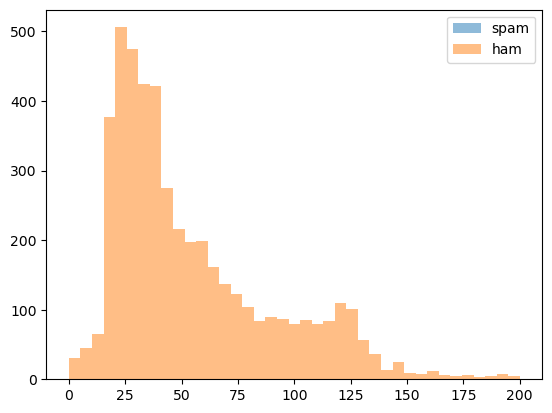

In [16]:
# Visualize length
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
bins = np.linspace(0, 200, 40)
plt.hist(Data[Data['Label'] == "Spam"]["Mail_len"], bins, alpha=0.5, label="spam")
plt.hist(Data[Data["Label"] == "ham"]["Mail_len"], bins, alpha=0.5, label="ham")
plt.legend(loc = "upper right")
plt.show()

In [17]:
#Check punctuation percentage as feature
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3) * 100

Data['punct%'] = Data['Mail_text'].apply(lambda x : count_punct(x))
Data.head()

,Label,Mail_text,Mail_text_clean,Mail_text_tokenised,Mail_text_nostop,Mail_text_stemmed,Mail_len,punct%
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[Ive, been, searching, for, the, right, words,...","[Ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, i,...",160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, i, dont, think, goe, usf, live, around, ...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like...",62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[i, have, a, date, on, sunday, with, will]",28,7.1


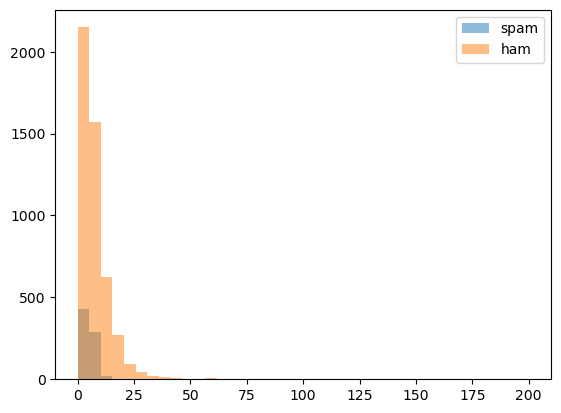

In [18]:
# Visualize punct%
plt.hist(Data[Data["Label"] == "spam"]["punct%"], bins, alpha=0.5, label="spam")
plt.hist(Data[Data["Label"] == "ham"]["punct%"], bins, alpha=0.5, label="ham")
plt.legend(loc="upper right")
plt.show()

In [20]:
#feature
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokenizer = RegexpTokenizer("[\w']+")
    tokens = tokenizer.tokenize(text)
    stem_words = [PorterStemmer().stem(word) for word in tokens if word not in stopword]
    return stem_words

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(Data['Mail_text'])

X_features = pd.concat([Data['Mail_len'], Data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()
    

,Mail_len,punct%,0,1,2,3,4,5,6,7,...,8096,8097,8098,8099,8100,8101,8102,8103,8104,8105
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Build Classifier Model

In [21]:
# plit train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Data['Label'], test_size=0.2)

In [23]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


MultinomialNB()

In [24]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9344703770197487

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


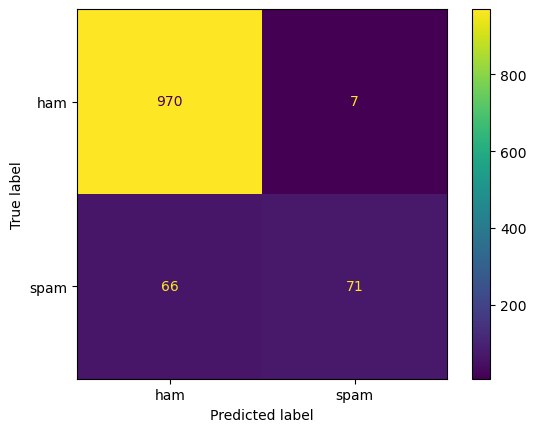

In [25]:
plot_confusion_matrix(nb_model, X_test, y_test)

In [27]:
from sklearn.svm import LinearSVC
sv_model = LinearSVC()
sv_model.fit(X_train, y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [28]:
y_pred1 = sv_model.predict(X_test)
accuracy_score(y_test, y_pred1)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8904847396768402

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


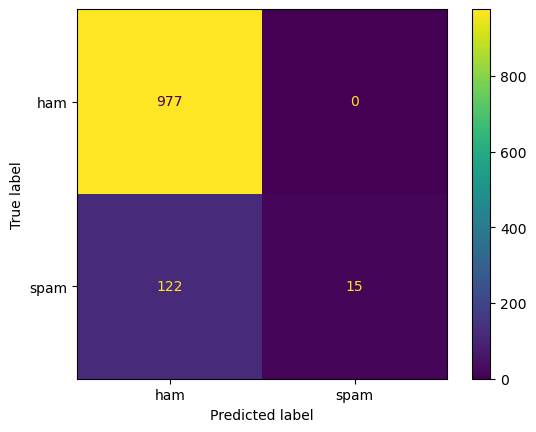

In [29]:
plot_confusion_matrix(sv_model, X_test, y_test)